In [146]:
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

dataset_file = 'dataset_index.csv'
textures_file = 'textures_index.csv'

In [2]:
from os import listdir


In [11]:
names = []
for fruit_class in os.listdir(os.path.join('fruits-360', 'Training')):
    names.append(str(fruit_class))

In [12]:
names

['Apple Red Delicious',
 'Huckleberry',
 'Litchi',
 'Pear',
 'Strawberry',
 'Avocado',
 'Pomegranate',
 'Dates',
 'Carambula',
 '.DS_Store',
 'Granadilla',
 'Tamarillo',
 'Kiwi',
 'Lemon',
 'Guava',
 'Apple Golden 2',
 'Apple Red 1',
 'Mandarine',
 'Quince',
 'Pear Monster',
 'Raspberry',
 'Pitahaya Red',
 'Apple Golden 3',
 'Grape Pink',
 'Banana Red',
 'Maracuja',
 'Plum',
 'Cherry',
 'Nectarine',
 'Clementine',
 'Grape White',
 'Apple Braeburn',
 'Mango',
 'Cocos',
 'Avocado ripe',
 'Passion Fruit',
 'Apple Granny Smith',
 'Kumquats',
 'Grape White 2',
 'Apricot',
 'Limes',
 'Apple Red Yellow',
 'Pear Williams',
 'Salak',
 'Grapefruit Pink',
 'Apple Golden 1',
 'Banana',
 'Apple Red 2',
 'Lemon Meyer',
 'Pepino',
 'Tangelo',
 'Cactus fruit',
 'Papaya',
 'Apple Red 3',
 'Pear Abate',
 'Pineapple',
 'Orange',
 'Kaki',
 'Grapefruit White',
 'Peach',
 'Peach Flat']

In [31]:
df = pd.DataFrame(columns=['Class', 'Path'])
df.append({'Class': '1', 'Path': '1'}, ignore_index=True )
df.append({'Class': '2', 'Path': '3'}, ignore_index=True )

,Class,Path
0,2,3


In [32]:
df

,Class,Path


In [66]:
folders_to_add = ['Training', 'Validation']

df = pd.DataFrame(columns=['Class', 'Path'])

for folder in folders_to_add:
    if 'DS' not in folder:
        for fruit_class in os.listdir(os.path.join('fruits-360', folder)):
            if 'DS' not in fruit_class:
                for name in os.listdir(os.path.join('fruits-360', folder, fruit_class)):
                    df = df.append({'Class': str(fruit_class), 'Path': str(os.path.join('fruits-360',folder, fruit_class, name))}, ignore_index=True )

In [81]:
# Save to CSV
df.to_csv(dataset_file, index=False)

In [82]:
df2 = pd.read_csv(dataset_file)

In [83]:
df.shape

(38409, 2)

In [84]:
df2.shape

(38409, 2)

In [76]:
df.groupby(['Class']).size()


Class
Apple Braeburn         656
Apple Golden 1         656
Apple Golden 2         656
Apple Golden 3         642
Apple Granny Smith     656
Apple Red 1            656
Apple Red 2            656
Apple Red 3            573
Apple Red Delicious    656
Apple Red Yellow       656
Apricot                656
Avocado                570
Avocado ripe           657
Banana                 656
Banana Red             656
Cactus fruit           656
Carambula              656
Cherry                 656
Clementine             656
Cocos                  656
Dates                  656
Granadilla             656
Grape Pink             656
Grape White            656
Grape White 2          656
Grapefruit Pink        656
Grapefruit White       656
Guava                  656
Huckleberry            656
Kaki                   656
Kiwi                   622
Kumquats               656
Lemon                  328
Lemon Meyer            656
Limes                  656
Litchi                 656
Mandarine             

In [152]:
class FruitsDataset(Dataset):
    """Fruits dataset."""

    def __init__(self, csv_file, cl, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        aux = pd.read_csv(csv_file)
        self.fruits_idx = aux[aux['Class'] == cl]
        self.transform = transform

    def __len__(self):
        return len(self.fruits_idx)

    def __getitem__(self, idx):
        img_name = self.fruits_idx.iloc[idx, 1]
        image = io.imread(img_name)

        if self.transform:
            image = self.transform(image)

        return image
    
class TexturesDataset(Dataset):

    def __init__(self, csv_file, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.textures = pd.read_csv(csv_file)
        self.transform = transform

    def __len__(self):
        return len(self.textures)

    def __getitem__(self, idx):
        img_name = self.textures.iloc[idx, 0]
        image = io.imread(img_name)

        if self.transform:
            image = self.transform(image)

        return image

In [85]:
fruits_idx = pd.read_csv(dataset_file)

In [86]:
fruits_idx.iloc[0, 1]

'fruits-360/Training/Apple Red Delicious/r_236_100.jpg'

In [127]:


fruits_avocado = FruitsDataset(csv_file=dataset_file, cl='Avocado')
fruits_orange = FruitsDataset(csv_file=dataset_file, cl='Orange')


0 (100, 100, 3)
[255 255 255]
1 (100, 100, 3)
[255 255 255]
2 (100, 100, 3)
[255 255 255]
3 (100, 100, 3)
[255 255 255]
4 (100, 100, 3)
[255 255 255]
5 (100, 100, 3)
[255 255 255]


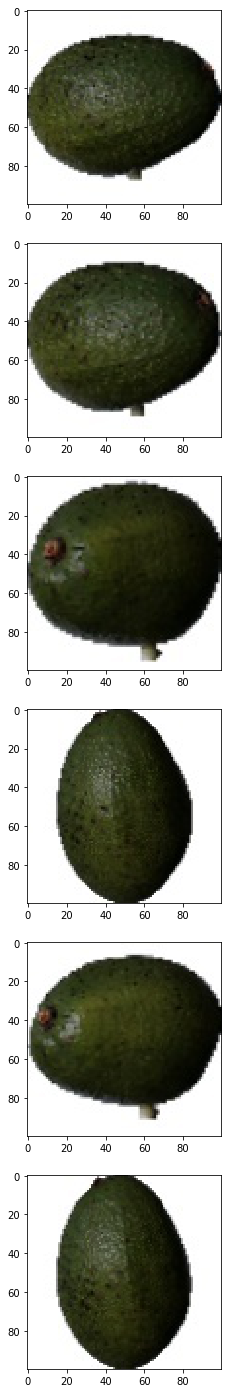

In [157]:
fig, ax = plt.subplots(nrows=6, ncols=1, figsize=(10,25))

for i in range(len(fruits_avocado)):
    sample = fruits_avocado[i]

    print(i, sample.shape)
    print(sample[0,0,:])
    ax[i].imshow(sample)
    if i == 5:
        plt.show()
        break

In [140]:
dataloader = DataLoader(fruits_avocado, batch_size=100,
                        shuffle=True, num_workers=4)

In [143]:
len(fruits_orange)

639

In [141]:
for i_batch, sample_batched in enumerate(dataloader):
    print(i_batch, sample_batched.size())

0 torch.Size([100, 100, 100, 3])
1 torch.Size([100, 100, 100, 3])
2 torch.Size([100, 100, 100, 3])
3 torch.Size([100, 100, 100, 3])
4 torch.Size([100, 100, 100, 3])
5 torch.Size([70, 100, 100, 3])


In [139]:
? dataloader

In [148]:
df = pd.DataFrame(columns=['Path'])


for t in os.listdir('textures'):
    df = df.append({'Path': str(os.path.join('textures',t))}, ignore_index=True )
df.to_csv(textures_file, index=False)

In [154]:
textures = TexturesDataset(csv_file=textures_file)


0 (100, 100, 3)
1 (100, 100, 3)
2 (100, 100, 3)
3 (100, 100, 3)
4 (100, 100, 3)
5 (100, 100, 3)


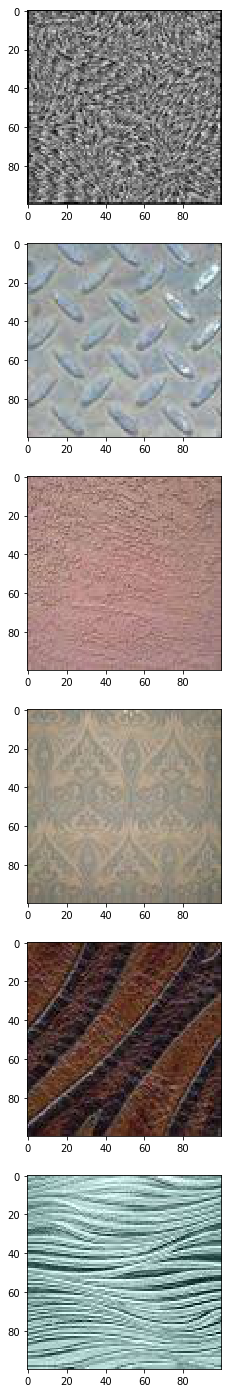

In [156]:
fig, ax = plt.subplots(nrows=6, ncols=1, figsize=(10,25))

for i in range(len(textures)):
    sample = textures[i]

    print(i, sample.shape)

    ax[i].imshow(sample)
    if i == 5:
        plt.show()
        break

In [187]:
class ChangeBackground(object):


    def __init__(self, textures):
        self.textures = textures

    def __call__(self, image):
        h, w = image.shape[:2]
        maxvals = len(self.textures)
        text_idx = randint(0,maxvals-1)
        image = np.where(image >= [240, 240, 240], self.textures[text_idx], image)
        '''for i in range(h):
            for j in range(w):
                if (image[i,j,:] >= [245, 245, 245]).all():
                    image[i,j,:] = self.textures[text_idx][i,j,:]'''
        return image

In [166]:
from torchvision import transforms, utils
from random import randint


In [188]:

test = FruitsDataset(csv_file=dataset_file, cl='Pineapple', transform = transforms.Compose([ChangeBackground(textures)]))


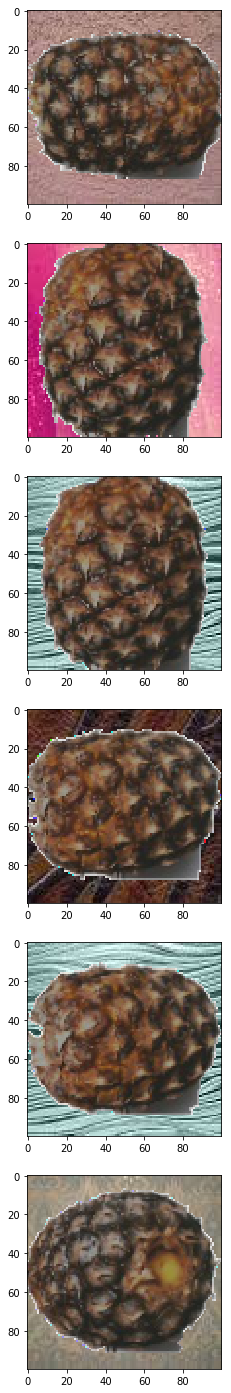

In [190]:
fig, ax = plt.subplots(nrows=6, ncols=1, figsize=(10,25))

for i in range(len(test)):
    sample = test[i]
    ax[i].imshow(sample)
    if i == 5:
        plt.show()
        break